In [1]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Câu hỏi: Hãy cho biết phân bố các công ty có sử dụng nhân viên IT trên toàn nước mỹ

### Mục đích
- Định hướng nghề nghiệp: Nếu bạn đang cân nhắc sự nghiệp trong lĩnh vực công nghệ thông tin, bạn có thể muốn biết những nơi nào có nhiều cơ hội việc làm hơn.
- Đầu tư và kinh doanh: Nếu bạn là nhà đầu tư hoặc chủ doanh nghiệp, bạn có thể muốn hiểu nơi nào có tiềm năng phát triển cao hơn trong lĩnh vực công nghệ.
- Xây dựng mạng lưới quan hệ: Bạn có thể muốn biết nơi nào có cộng đồng công nghệ mạnh mẽ để mở rộng mạng lưới quan hệ.

### Bước 1: Đọc các file dataframe và geopandas và xử lý chúng

In [2]:
# Đọc file địa lý phân bố theo từng bang của nước mỹ
gdf=gp.read_file("./map/cb_2022_us_state_500k/cb_2022_us_state_500k.shp")
# Đọc file dataset đã làm bên phần tiền xử lý
df=pd.read_csv('cleaned_data_Data_Scientist_Salary.csv')
# Tạo một bản copy
df_copy=df.copy()
# Cắt phần viết tắt của các state trong cột location
df_copy['State'] = df_copy['Location'].apply(lambda x: x.split(',')[1].strip())
# Lọc ra những cột cần sử dụng
col=['Location','Company Name','State']
df_copy=df_copy[col]
# Có phần không thể cắt được nên ta phải xử lý chúng
df_copy.loc[df_copy['State'] == "Los Angeles", 'State'] = "CA"
# Do có những người có cùng trong một công ty nên khi ta lấy những cột kia nên bị duplicated do đó ta phải xử lý chúng
df_copy.duplicated().sum()
df_copy.drop_duplicates()
#Đếm các số lượng công ty nằm trong cùng 1 khu vực lưu lại thành 1 cột Số lượng
so_luong_cong_ty=df_copy['State'].value_counts()
df_so_luong_cong_ty = pd.DataFrame({'State': so_luong_cong_ty.index, 'SoLuong': so_luong_cong_ty.values})
df_so_luong_cong_ty

,State,SoLuong
0,CA,152
1,MA,103
2,NY,72
3,VA,41
4,IL,40
5,MD,35
6,PA,33
7,TX,28
8,NC,21
9,WA,21


In [3]:
#Đọc các file nằm trên lục địa mỹ không nằm ở các đảo xa thuộc Mỹ
df_2=pd.read_csv("cacbang.txt", sep='\t')
df_2=df_2.drop(columns="pct_food_insecure")
# Merge dataframe lục địa Mỹ và geopandas 
gdf = gdf.merge(df_2,left_on='STUSPS',right_on='state')

c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

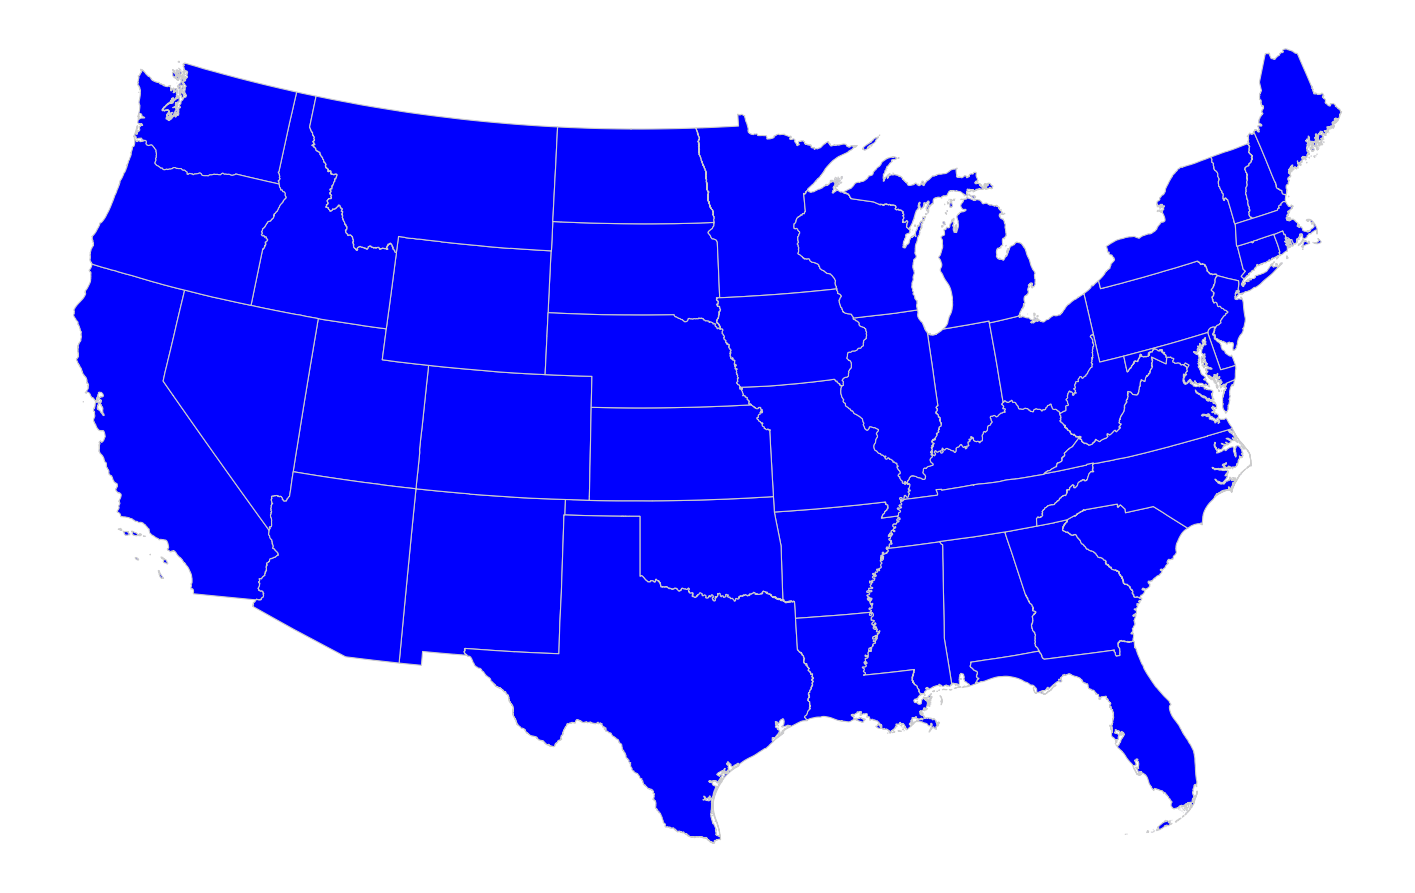

In [4]:
# Tạo một bản "copy" của gdf 
visframe = gdf.to_crs({'init':'epsg:2163'})
# visualize lục địa mỹ lúc này
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')
visframe[~visframe.STUSPS.isin(['HI','AK'])].plot(color='blue', linewidth=0.8, ax=ax, edgecolor='0.8')

### Bước 2: Visualize bản đồ heatmap phân bố trên lục địa Mỹ

In [5]:
# Lấy các cột cần thiết trong geodataframe để sử dụng 
gdf2 = visframe[['STUSPS', 'geometry']]
gdf2 = gdf2.rename(columns={'STUSPS': 'State'})
gdf2 =gdf2.set_index('State')
# merge 2 cái geodataframe và dataframe tạo thành 1 geodataframe mới
gdf3 = gdf2.merge(df_so_luong_cong_ty, on = 'State',how='outer')
gdf3 = gdf3.fillna(0)
gdf3

,State,geometry,SoLuong
0,NM,"POLYGON ((-862284.832 -1454476.300, -862055.89...",3.0
1,SD,"POLYGON ((-318904.047 7722.249, -318345.973 77...",0.0
2,CA,"MULTIPOLYGON (((-1717362.709 -1090134.236, -17...",152.0
3,KY,"MULTIPOLYGON (((946128.073 -881437.420, 946563...",6.0
4,AL,"MULTIPOLYGON (((1149241.382 -1527641.924, 1149...",8.0
5,GA,"MULTIPOLYGON (((1774030.600 -1324555.678, 1774...",6.0
6,AR,"POLYGON ((482000.986 -928930.836, 482025.138 -...",0.0
7,PA,"POLYGON ((1619194.622 -262054.080, 1619096.160...",33.0
8,MO,"POLYGON ((357015.839 -482423.567, 357411.771 -...",9.0
9,CO,"POLYGON ((-786661.937 -668512.657, -785229.222...",11.0


<Figure size 10000x10000 with 0 Axes>

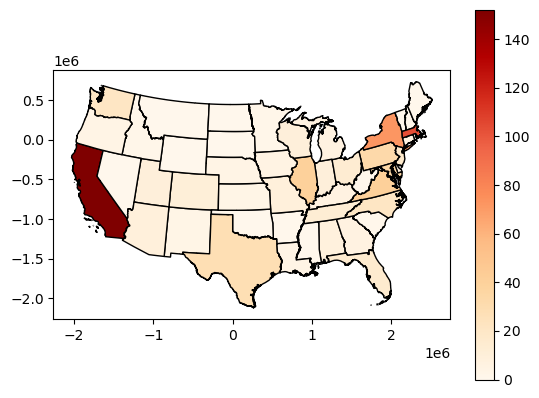

In [6]:
# Visualize geodataframe
plt.figure(figsize=(100, 100))
gdf3[~gdf3.State.isin(['HI','AK'])].plot(column = 'SoLuong', cmap = 'OrRd', legend = True, edgecolor='black')
plt.show()

## Nhận xét:
### Tổng quát:
- Phân bố các công ty sử dụng nhân viên IT trên toàn nước Mỹ phản ánh sự tập trung của ngành công nghệ thông tin và phát triển phần mềm ở các khu vực địa lý khác nhau. Một số yếu tố ảnh hưởng đến phân bố này bao gồm cơ sở hạ tầng công nghệ, môi trường kinh doanh, nguồn nhân lực và chi phí hoạt động.
### Trong đó:
- Vùng bờ Tây: Khu vực San Francisco Bay Area, bao gồm Silicon Valley, là trung tâm lớn nhất về công nghệ và phần mềm. Nhiều công ty công nghệ lớn đều có trụ sở tại đây.
- Vùng bờ Đông: New York City và khu vực lân cận là một trung tâm tài chính và kinh doanh, với nhiều công ty công nghệ chuyên về fintech, quảng cáo kỹ thuật số và truyền thông. Phía Đông cũng có nhiều công ty công nghệ liên quan đến học thuật và y tế.
